In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
import warnings
warnings.filterwarnings('ignore')
import requests
from google.colab import files
 
 
uploaded = files.upload()

Saving train.csv to train (2).csv


In [5]:
train = pd.read_csv ("train.csv")
train.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


Primer vistazo a los datos.

In [7]:
train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Comprobamos que no hay ningún nulo en nuestro dataframe.

In [74]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    dicc_ceros = {}

    for col in lista_columnas:
        
        
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
       
        IQR = Q3 - Q1
        
       
        outlier_step = 1.5 * IQR
        
     
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)] 
        
        if outliers_data.shape[0] > 0:

          dicc_indices[col] = (list(outliers_data.index))        

    
    return dicc_indices 

Función explicada en el py correspondiente que aisla outliers

In [64]:
train_numericas = train.select_dtypes(include=np.number)

Generamos df con las variables numéricas

In [65]:
lista_columnas = train_numericas.columns
lista_columnas

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

Aislamos el listado de columnas que contienen variables numéricas para usarlo en la función anterior.

In [75]:
ind = detectar_outliers(lista_columnas, train)
print(ind)

{'carat': [40, 85, 130, 173, 244, 264, 274, 289, 292, 295, 312, 346, 398, 574, 587, 662, 681, 682, 716, 725, 728, 782, 785, 798, 799, 801, 818, 928, 973, 993, 995, 1011, 1025, 1026, 1051, 1154, 1216, 1249, 1315, 1388, 1402, 1417, 1418, 1423, 1429, 1433, 1437, 1443, 1522, 1660, 1670, 1739, 1814, 1816, 1866, 1885, 1894, 1967, 1971, 1977, 1995, 2030, 2052, 2063, 2071, 2178, 2194, 2224, 2229, 2238, 2257, 2289, 2340, 2346, 2352, 2357, 2410, 2440, 2449, 2460, 2465, 2468, 2496, 2518, 2529, 2530, 2556, 2570, 2664, 2683, 2767, 2785, 2799, 2811, 2884, 2912, 2935, 2939, 2971, 2981, 3018, 3032, 3073, 3123, 3140, 3146, 3149, 3156, 3237, 3297, 3316, 3348, 3351, 3369, 3378, 3381, 3403, 3430, 3481, 3488, 3491, 3502, 3525, 3545, 3558, 3580, 3593, 3606, 3658, 3666, 3667, 3675, 3699, 3747, 3780, 3790, 3820, 3828, 3837, 3844, 3908, 4084, 4124, 4147, 4192, 4215, 4276, 4285, 4327, 4342, 4356, 4384, 4406, 4411, 4442, 4522, 4594, 4621, 4634, 4649, 4651, 4673, 4674, 4679, 4703, 4721, 4730, 4790, 4824, 4829, 48

Ejecutamos la función que nos devuelve el índice de los outliers.

In [12]:
valores = list(ind.values())

Guardamos los valores en una lista

In [13]:
valores = [indice for sublista in valores for indice in sublista]

Iteramos esta lista de listas

In [14]:
valores = set(valores)

Y la convertimos en un set

In [15]:
train_sin_outliers = train.copy()

In [16]:
finaltrain = train_sin_outliers.drop(train_sin_outliers.index[list(valores)] )

Generamos df sin outliers

In [17]:
trainfinal_numericas = finaltrain.select_dtypes(include=np.number)

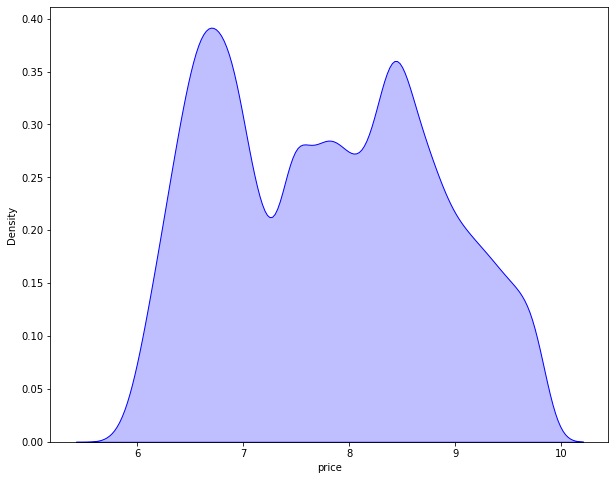

In [18]:
sns.distplot(
    train.price,
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

Comprobamos distribución de la variable respuesta. Tiene una distribución medianamente normal, así que nos sirve.

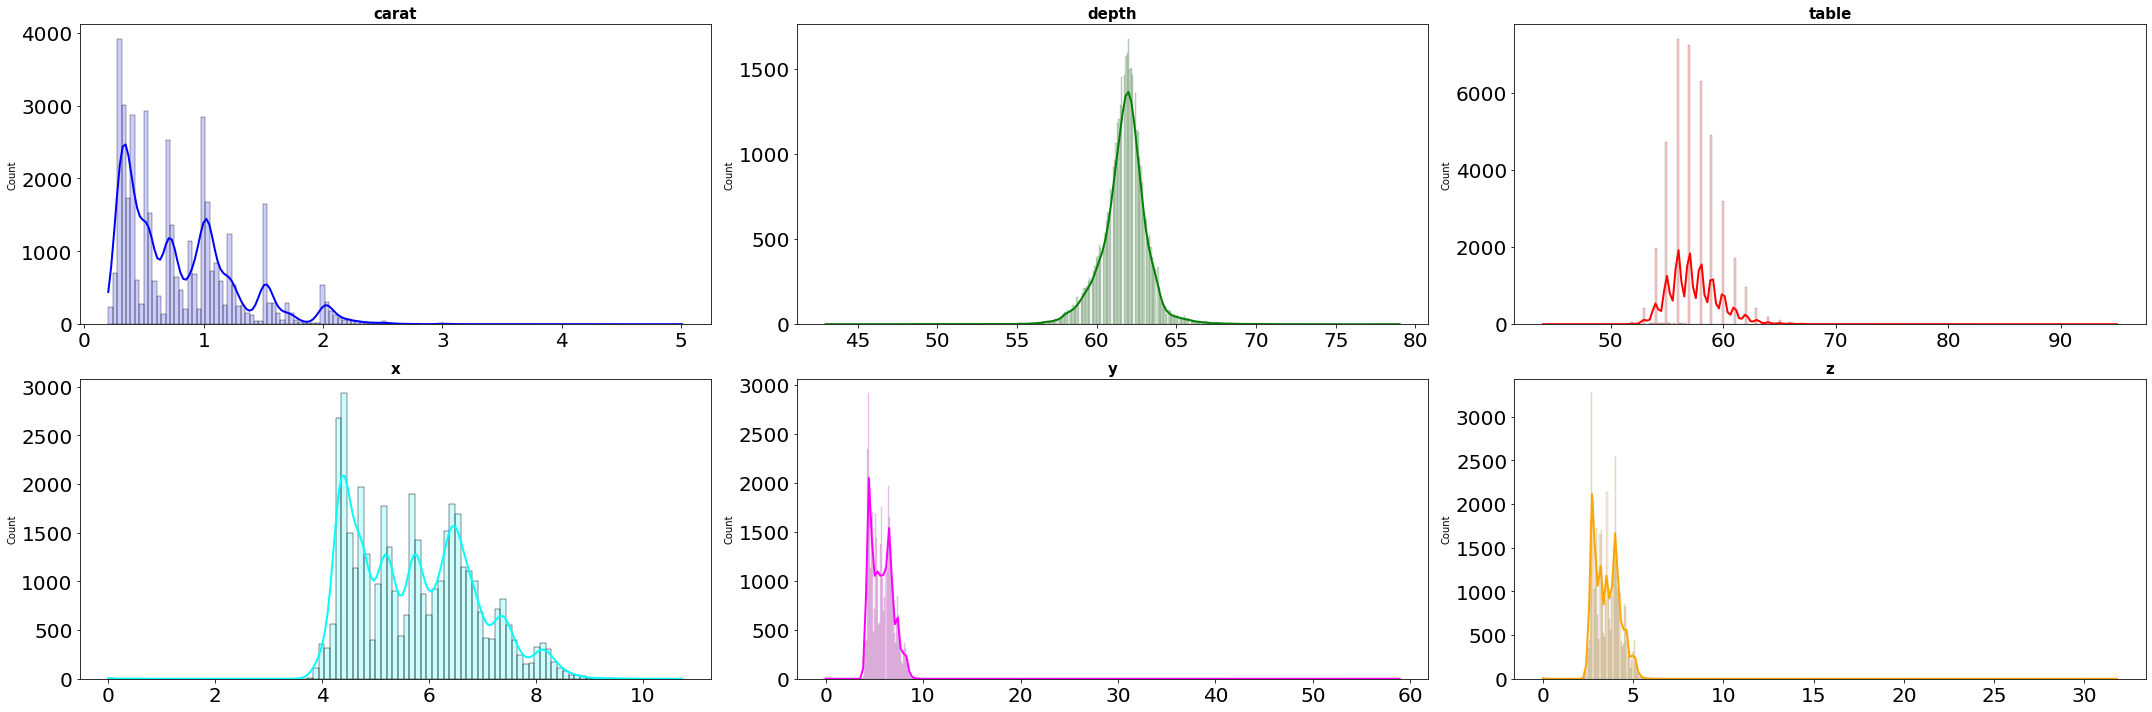

In [19]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = train.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("price")
columnas_numeric = columnas_numeric.drop("id")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = train,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

Comprobamos distribución de las variables predictoras.

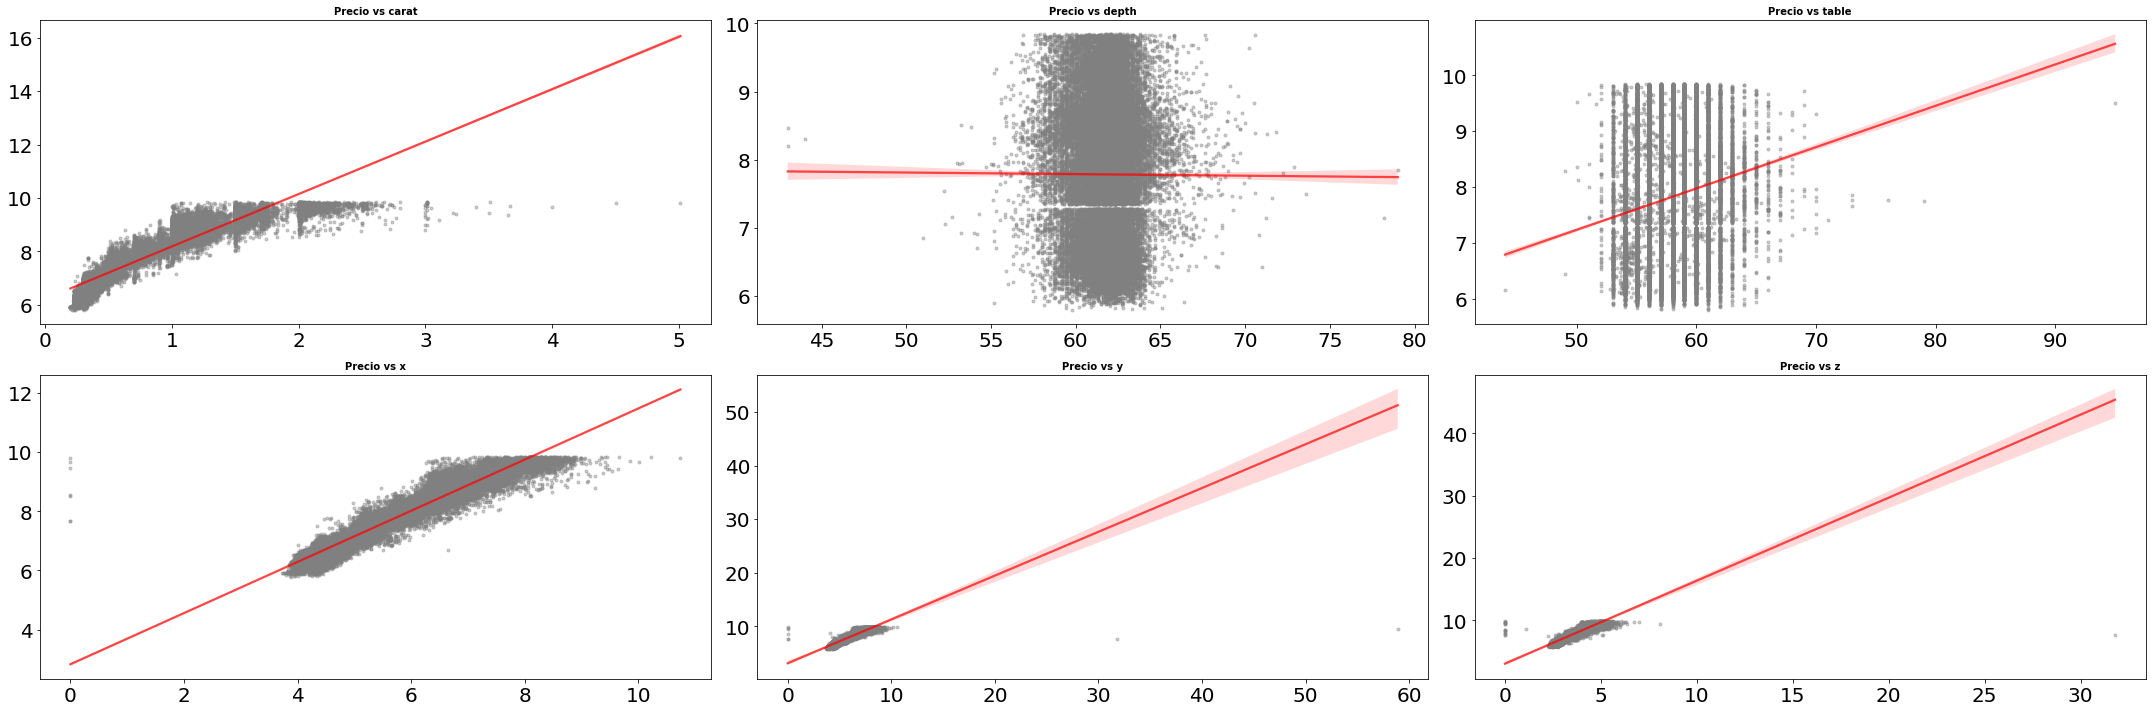

In [20]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = train.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("price")
columnas_numeric = columnas_numeric.drop("id")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = train[colum], 
        y = train["price"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

In [21]:
mask = np.triu(np.ones_like(train.corr(), dtype = np.bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

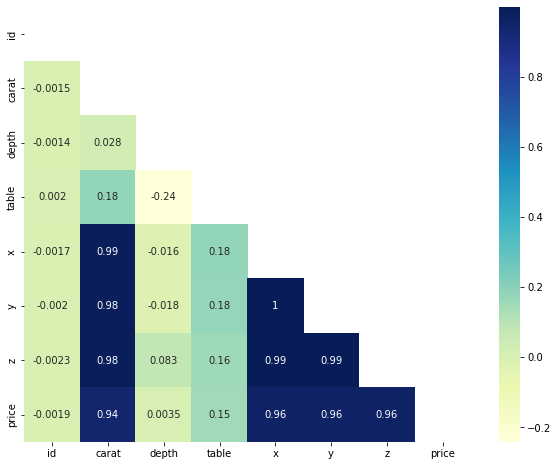

In [22]:
sns.heatmap(finaltrain.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

Y comprobamos su correlación entre ellas y con la variable respuesta.

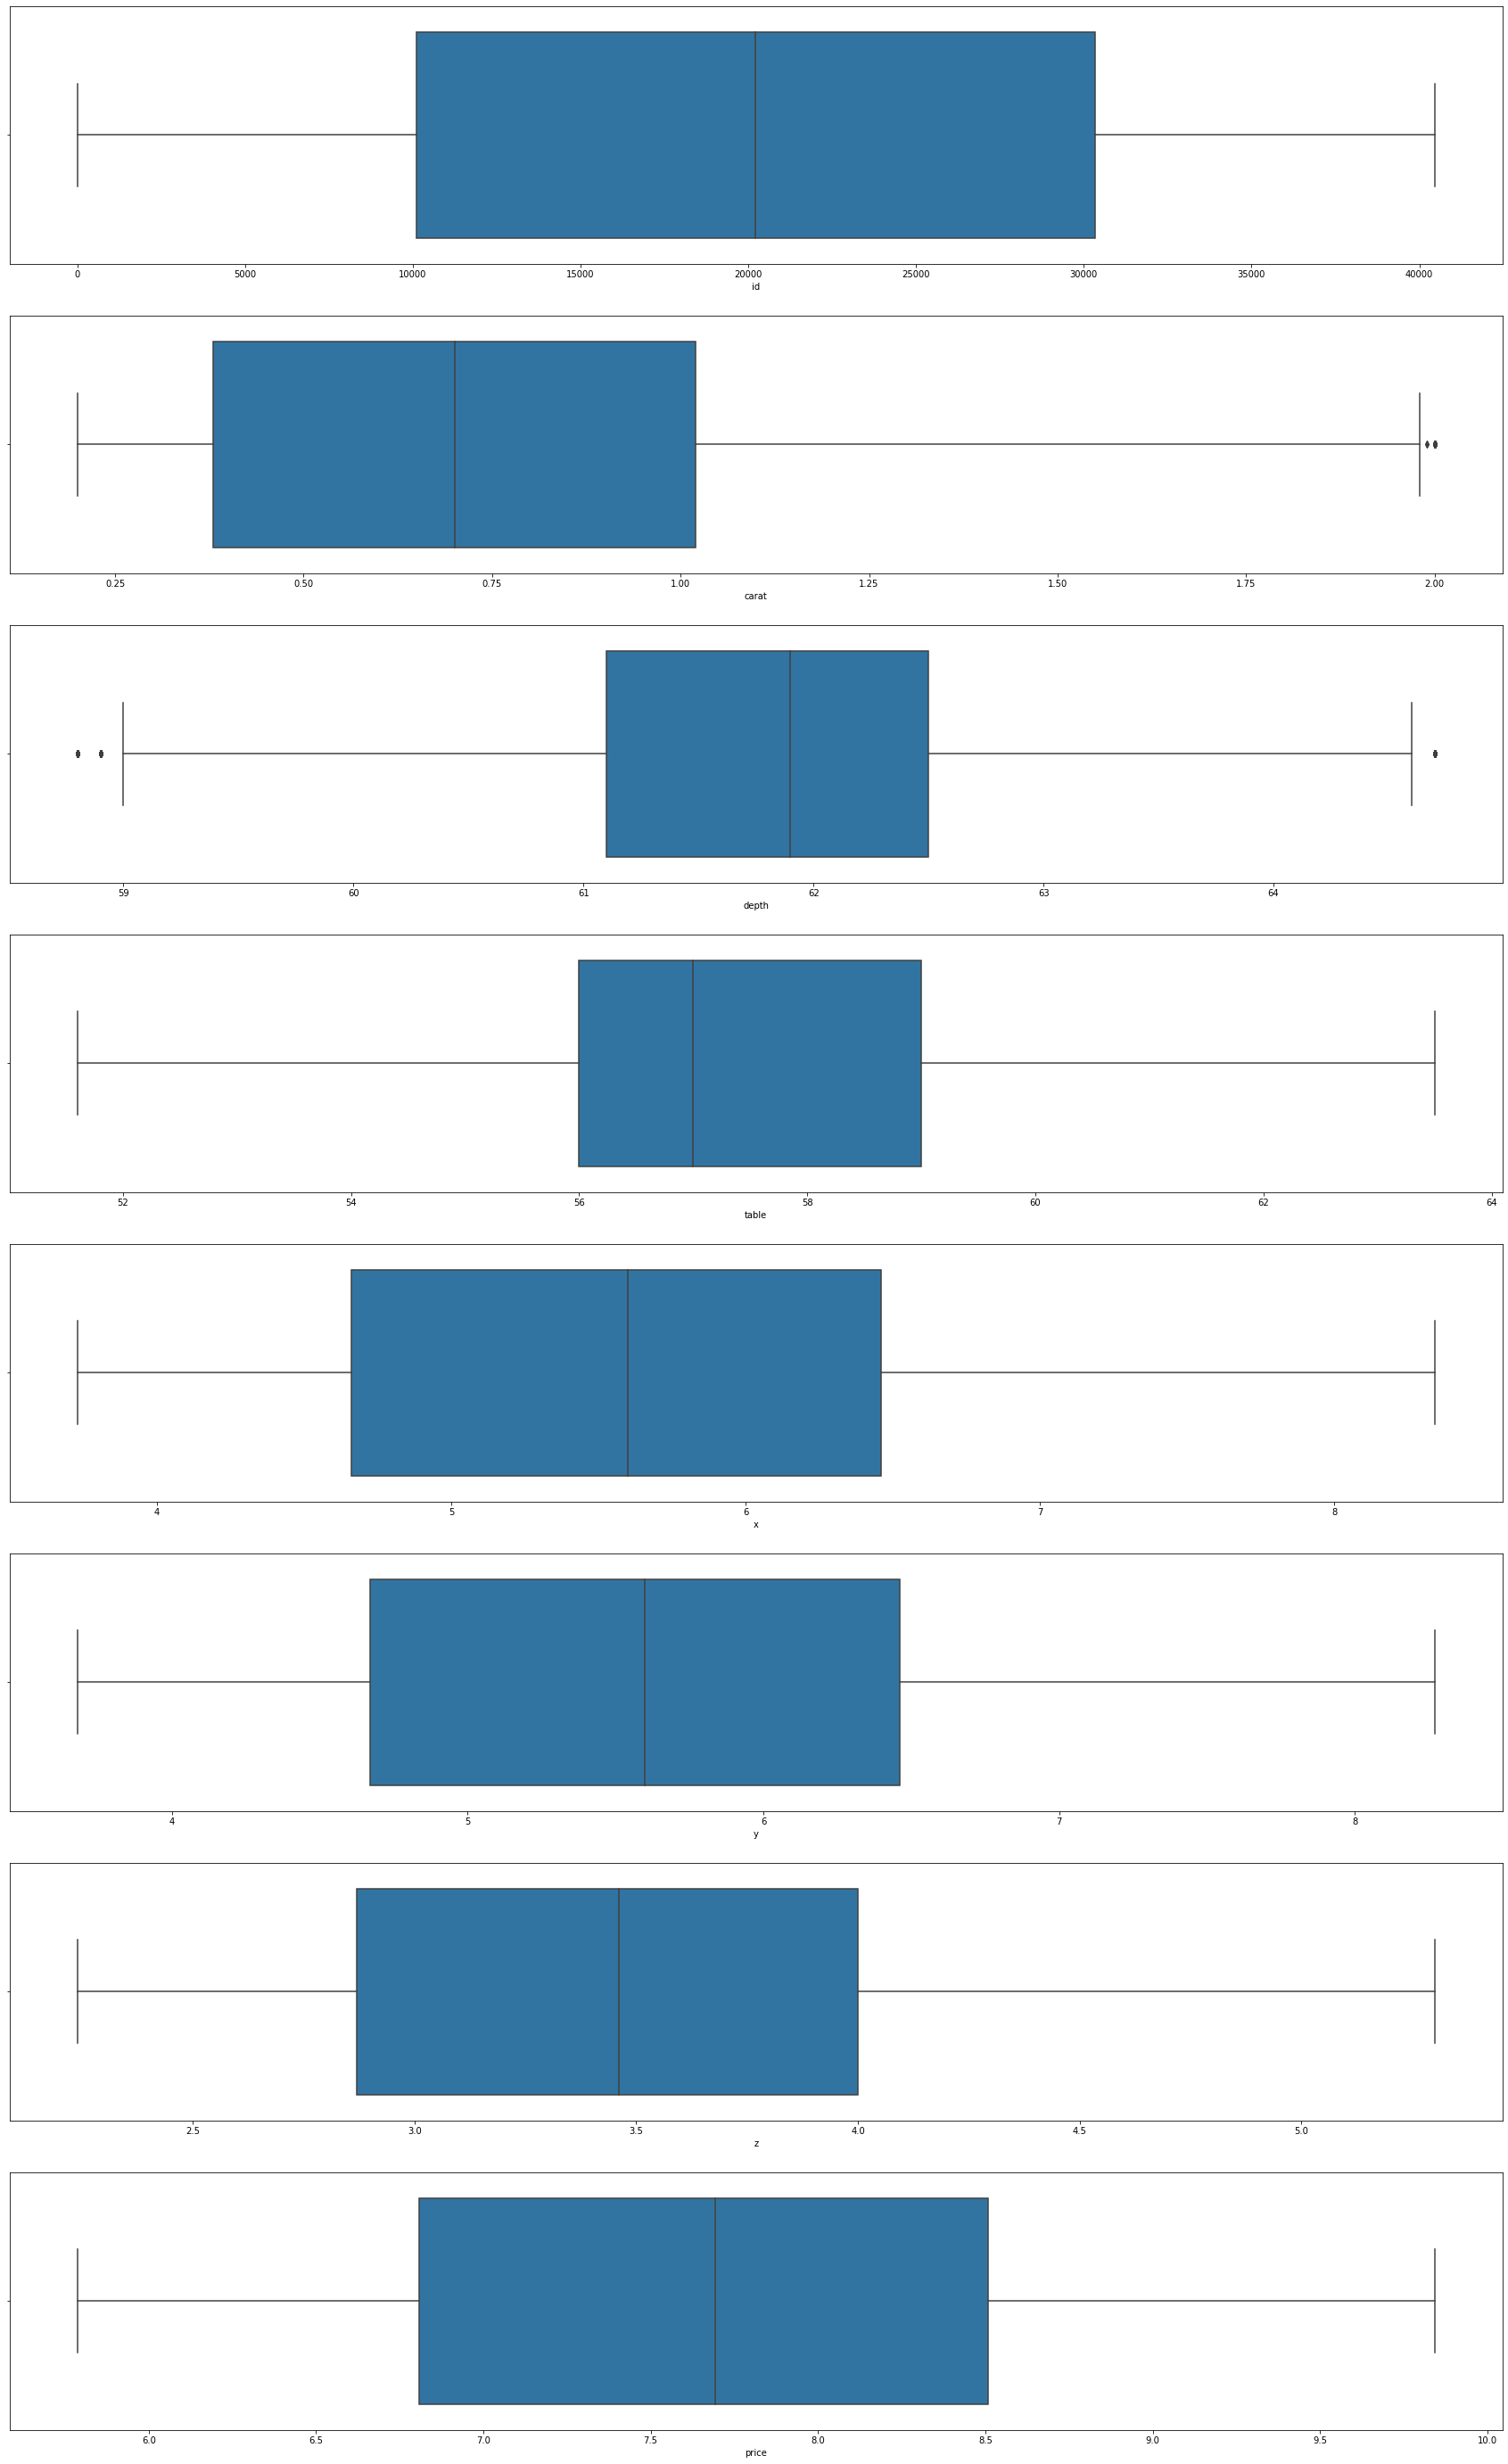

In [23]:
fig, ax = plt.subplots(8, 1, figsize=(30,50))

for i in range(len(trainfinal_numericas.columns)):
    sns.boxplot(x=trainfinal_numericas.columns[i], data=trainfinal_numericas, ax=ax[i])
plt.show()

Comprobamos el haber eliminado los outliers correctamente

In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [25]:
train.cut.unique()


array(['Premium', 'Ideal', 'Very Good', 'Fair', 'Good'], dtype=object)

Sacamos valores únicos para saber qué mapear

In [26]:
mapa_cut = {"Fair":  0, 
       "Good": 1,
       "Very Good": 2,
       "Premium": 3,
       "Ideal": 4}

Ejecutamos mapeo en función de importancia ordinal de cada variable

In [27]:
finaltrain["cut"] = finaltrain["cut"].map(mapa_cut)

Aplicamos

In [28]:
finaltrain.color.unique()


array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

Y así sucesivamente

In [29]:
mapa_color = {"J":  0, 
       "I": 1,
       "H": 2,
       "G": 3,
       "F": 4,
       "E": 5,
       "D": 6}

In [30]:
finaltrain["color"] = finaltrain["color"].map(mapa_color)

In [31]:
finaltrain.clarity.unique()


array(['SI2', 'VVS2', 'VS2', 'VS1', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [32]:
mapa_clarity = {"I1":  0, 
       "SI2": 1,
       "SI1": 2,
       "VS2": 3,
       "VS1": 4,
       "VVS2": 5,
       "VVS1": 6,
       "IF": 7}

In [33]:
finaltrain["clarity"] = finaltrain["clarity"].map(mapa_clarity)

In [34]:
finaltrain.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,3,6,1,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,4,5,5,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,4,4,3,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,2,3,1,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,3,3,4,62.3,59.0,4.50,4.55,2.82,6.588
5,5,0.53,4,4,4,61.4,57.0,5.18,5.20,3.19,7.496
6,6,1.74,3,2,2,62.1,59.0,7.69,7.63,4.76,8.979
7,7,0.33,4,5,5,60.0,56.0,4.53,4.56,2.72,6.877
8,8,0.32,2,5,3,62.9,56.0,4.36,4.39,2.75,6.554
9,9,0.27,4,5,5,61.8,57.0,4.16,4.12,2.56,6.683


In [35]:
finaltrain = finaltrain.drop(columns= ["table", "x", "y", "z"])

Eliminamos table por tener poca relación con price y el resto de variables por tener gran correlación entre ellas

In [36]:
finaltrain.head(5)

,id,carat,cut,color,clarity,x,y,z,price
0,0,0.30,3,6,1,4.31,4.28,2.68,6.353
1,1,1.01,4,5,5,6.42,6.46,4.04,9.183
2,2,0.72,4,4,3,5.71,5.74,3.54,7.983
3,3,1.08,2,3,1,6.54,6.50,4.12,8.371
4,4,0.36,3,3,4,4.50,4.55,2.82,6.588


In [38]:
finaltrain.to_csv("train_4.csv")

In [39]:
files.download("train_4.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Guardamos y descargamos el dataframe obtenido